In [1]:
%cd "../.."

/home/ensai/projet-statistique-2022


In [10]:
from gensim import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.mixture import GaussianMixture as GMM
from sklearn.manifold import TSNE

import seaborn as sns
import plotly.express as px


from word_embedding.distance_wmd import *
import doc_embedding.moyenne as moyenne
from reduction_dim.correlation_matrix import *
import clustering.fit_clustering as CL 

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# sns.set(font_scale=2)
sns.set_style("darkgrid")

sns.set_context("poster")
meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"10"}

In [11]:
df_clustering = pd.read_csv("data/tuning/clustering/ensemble.csv",sep=";")
df_clustering["DocEmbedding"] = df_clustering["docEmbedding"] +" - " + df_clustering["docEmbedding2"]
df_clustering = df_clustering.sort_values("DocEmbedding")
df_clustering["Type Clustering"] = np.where(df_clustering["perplexity"].isna(),"Sans tSNE","Avec tSNE")
df_clustering = df_clustering[df_clustering["K"] >= 5]
df_clustering.head()

,K,Solver,MinSilhouette,silhouette,Cal-Harabasz,DBCV,ANMI,perplexity,wordEmbedding,docEmbedding,docEmbedding2,listClustering,DocEmbedding,Type Clustering
240,5,mcla,-1.0,0.068110,109.296568,-0.708325,0.420047,NaN,glove,Moyenne,TF,kmeans-gmm,Moyenne - TF,Sans tSNE
440,14,mcla,0.0,0.363368,11509.031400,-0.569160,0.673750,200.0,skipgram,Moyenne,TF,kmeans-gmm,Moyenne - TF,Avec tSNE
439,14,mcla,-1.0,0.363645,11517.437091,-0.566806,0.673745,200.0,skipgram,Moyenne,TF,kmeans-gmm,Moyenne - TF,Avec tSNE
437,13,mcla,0.0,0.345680,10554.007553,-0.559934,0.670560,200.0,skipgram,Moyenne,TF,kmeans-gmm,Moyenne - TF,Avec tSNE
436,13,mcla,-1.0,0.345291,10535.082643,-0.591480,0.670415,200.0,skipgram,Moyenne,TF,kmeans-gmm,Moyenne - TF,Avec tSNE


In [12]:
df_clustering = df_clustering[df_clustering["perplexity"] == 200]
df_clustering.loc[df_clustering.groupby(["wordEmbedding"])["silhouette"].idxmax()]

,K,Solver,MinSilhouette,silhouette,Cal-Harabasz,DBCV,ANMI,perplexity,wordEmbedding,docEmbedding,docEmbedding2,listClustering,DocEmbedding,Type Clustering
128,5,mcla,0.45,0.492868,20204.069777,-0.664900,0.703430,200.0,cbow,Moyenne,TFIDF,kmeans-gmm,Moyenne - TFIDF,Avec tSNE
320,6,mcla,-1.00,0.351358,6072.532887,-0.758637,0.590259,200.0,glove,Moyenne,TFIDF,kmeans-gmm,Moyenne - TFIDF,Avec tSNE
415,6,mcla,-1.00,0.401710,11176.365566,-0.635069,0.648408,200.0,skipgram,Moyenne,TF,kmeans-gmm,Moyenne - TF,Avec tSNE


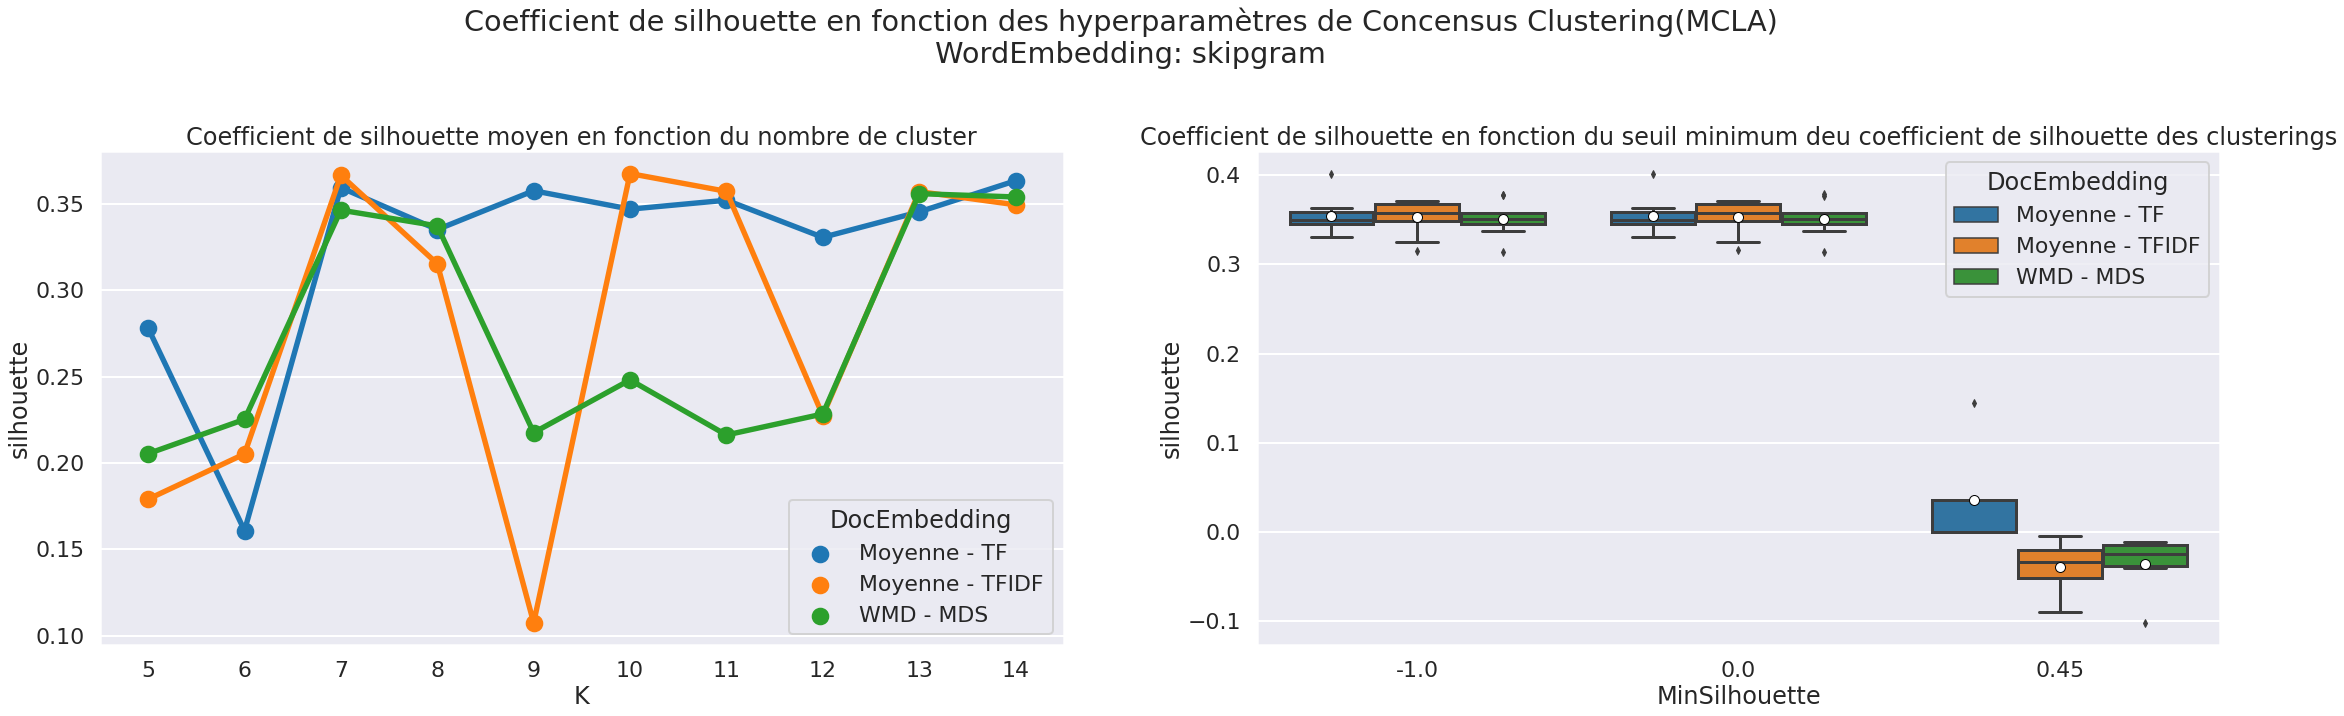

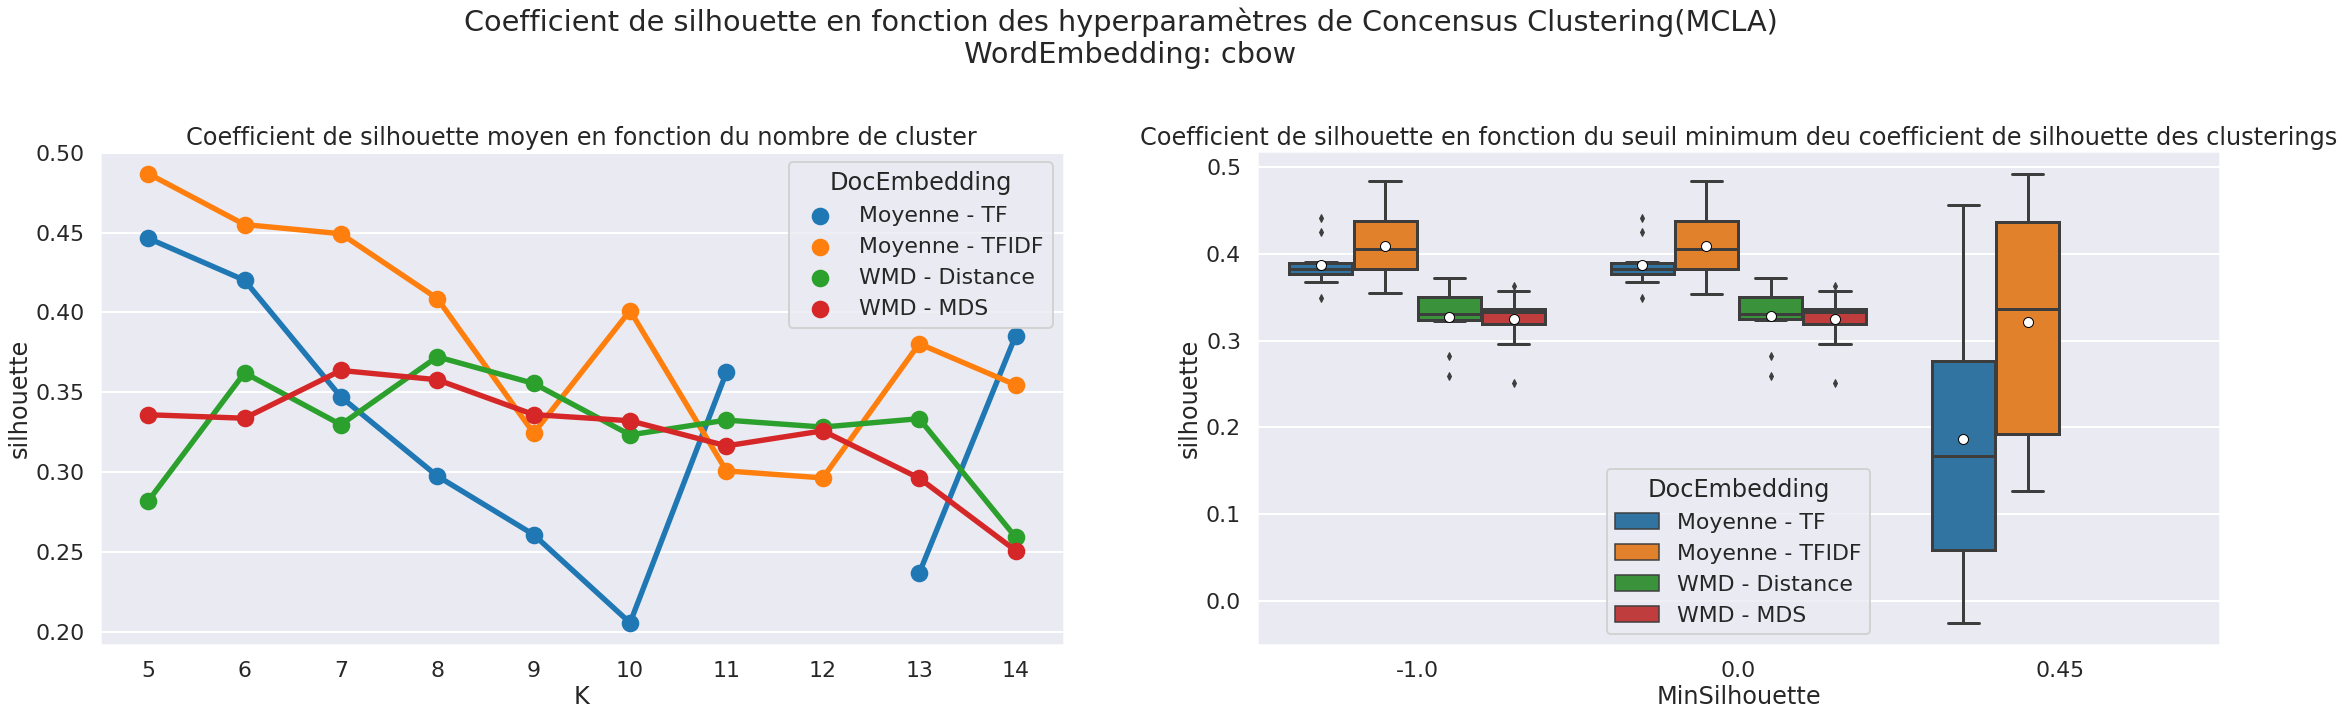

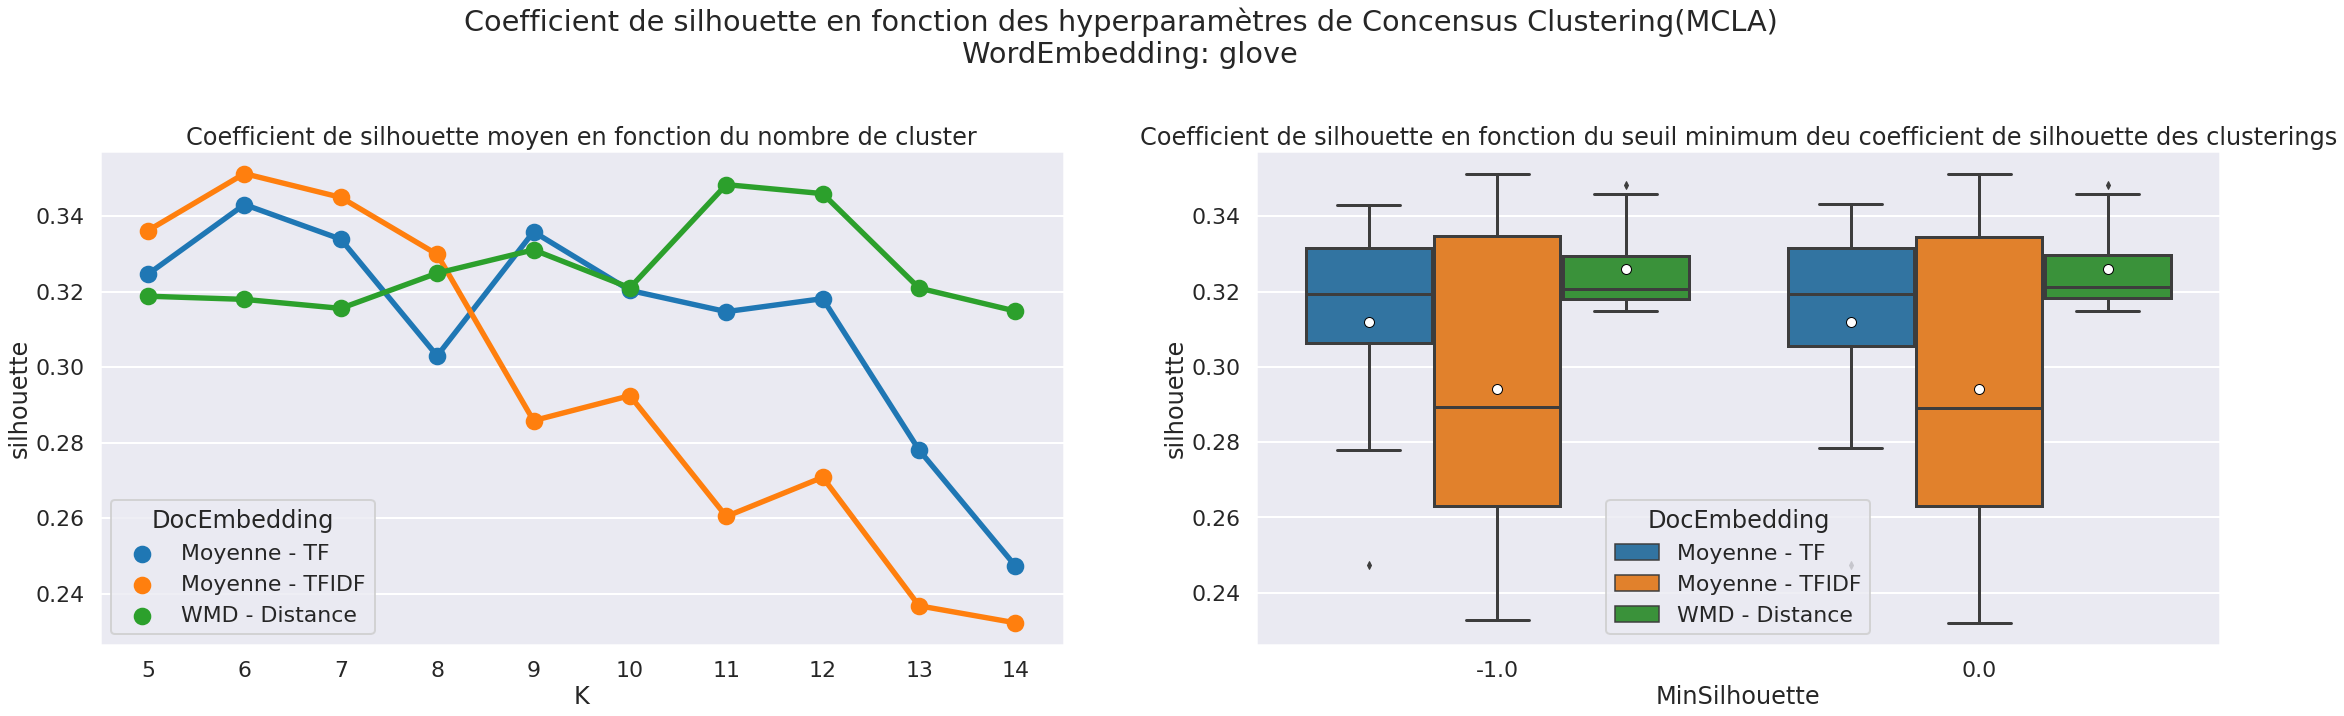

In [13]:
for modele in ["skipgram","cbow","glove"]:
    plt.figure(figsize = (38,20))

    sns.pointplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="silhouette",x="K",hue="DocEmbedding",ci=None,
        ax=plt.subplot(2,2,1,title=f"Coefficient de silhouette moyen en fonction du nombre de cluster"))

    sns.boxplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="silhouette",x="MinSilhouette",hue="DocEmbedding",showmeans=True,meanprops=meanprops,
        ax=plt.subplot(2,2,2,title=f"Coefficient de silhouette en fonction du seuil minimum deu coefficient de silhouette des clusterings"))

    plt.suptitle(f"Coefficient de silhouette en fonction des hyperparamètres de Concensus Clustering(MCLA) \n WordEmbedding: {modele}")
    plt.show()